# Proyecto Final - Covid-19 Analysis

### By: Fernanda González, Keily Marín, Samuel Lasso, Miguel Rodríguez, Carlos Serrano & Iván Valdés

### Importing the libraries to use

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
print('-> All libraries imported successfully.')

-> All libraries imported successfully.


In [24]:
df = pd.read_csv('Covid Data.csv')
print ('-> CSV file imported successfully.')

-> CSV file imported successfully.


### Data preparation and cleaning

In [25]:
#Evaluate if there are empty fields in the data.
empty_fields = df.isnull()
count_of_false_data = (empty_fields == False).sum()
print(count_of_false_data)

USMER                   1048575
MEDICAL_UNIT            1048575
SEX                     1048575
PATIENT_TYPE            1048575
DATE_DIED               1048575
INTUBED                 1048575
PNEUMONIA               1048575
AGE                     1048575
PREGNANT                1048575
DIABETES                1048575
COPD                    1048575
ASTHMA                  1048575
INMSUPR                 1048575
HIPERTENSION            1048575
OTHER_DISEASE           1048575
CARDIOVASCULAR          1048575
OBESITY                 1048575
RENAL_CHRONIC           1048575
TOBACCO                 1048575
CLASIFFICATION_FINAL    1048575
ICU                     1048575
dtype: int64


In [26]:
# Checking if there's null data, but with the values of null data in this particular data set
df_null = df.copy() #I'm creating a copy of the dataframe to not affect the original
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [27]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [28]:
# Checking the relation between pacient type and his intubation, contemplating the null data
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "-------------------------------------------------------------------", "\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be:
(33656, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be:
(159050, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be:
(848544, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE =

### Cleaning the date_died column

#### Python treats the Objects as a string, so we can make some changes in it.

In [29]:
# Creating a special column, assigning a 1 if the person died or a 0 if the person didn't died.
df_null['DEAD'] = [2 if i=='9999-99-99' else 1 for i in df_null.DATE_DIED]

In [30]:
# Replacing each 9999-99-99 value for a null value (NaN)
df_null['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [31]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2


### Cleaning up the classification of contagions

In [32]:
# We make a function to evaluate whether or not patients were detected with Covid, adding a column to locate them more easily.
def Covid_Not_Covid(val):
    if val >= 4:
        return 2
    else:
        return 1

In [33]:
# We create a new column to show the result of the application of the function created above.
df_null['Covid_Not_Covid'] = df_null["CLASIFFICATION_FINAL"].apply(Covid_Not_Covid)

In [34]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,2
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2


# MOSCOW Part

In [35]:
#Evaluating the total number of positive and negatives cases.
classification = np.array(df_null['CLASIFFICATION_FINAL']); #Array for storing 'CLASIFFICATION_FINAL' data.

positive_tests = np.count_nonzero(classification <= 3) #Total of occurrence of numbers less than or equal to 3.
negative_tests = np.count_nonzero(classification >= 4) #Total of occurrence of numbers grater or than equal to 4.
total = positive_tests + negative_tests

print("El total de casos positivos es de:", positive_tests , "| El total de casos negativos es de:", negative_tests, 
      "| Total de casos: ", total)

El total de casos positivos es de: 391979 | El total de casos negativos es de: 656596 | Total de casos:  1048575


In [36]:
#Atenttion type received by positive cases.
positive_cases = df_null[df_null['CLASIFFICATION_FINAL'] <= 3] #Filter positive cases.

#Occurrences per patient.
attention_counts = positive_cases['PATIENT_TYPE'].value_counts()

print(attention_counts)

1    280687
2    111292
Name: PATIENT_TYPE, dtype: int64


## Porcentaje de Infantes contagiados con su porcentaje de mortalidad

In [37]:
# Creating a special dataframe only for the kids in the dataset
df_kids = df_null[df_null['AGE'] < 12].copy()
df_kids

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
151,1,2,1,2,26/02/2020,NaN,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
153,1,2,1,2,08/05/2020,1.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,2
155,1,2,2,2,17/07/2020,NaN,1.0,0.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,5,NaN,1,2
161,1,2,2,2,NaN,2.0,2.0,2.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2,1
162,1,2,1,2,NaN,2.0,1.0,10.0,2.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,3,2.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048337,2,13,2,2,NaN,2.0,2.0,10.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048342,2,13,2,2,NaN,2.0,2.0,2.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048404,1,13,2,2,NaN,2.0,1.0,3.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048434,1,13,1,1,NaN,NaN,2.0,0.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2


In [38]:
# Checking the amount of kids with or without Covid
df_kids["Covid_Not_Covid"].value_counts()
# Understanding that value 1 means that they are infected and value 2 means that they are not infected.

2    28773
1     5131
Name: Covid_Not_Covid, dtype: int64

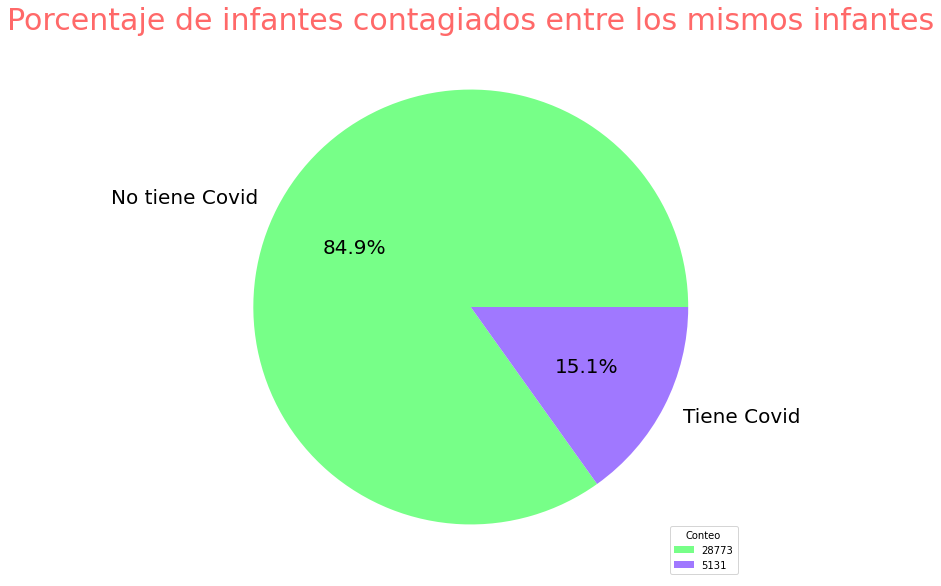

In [39]:
# Creating a graph to make visible the percentage of infected and non-infected children.
labels = ["No tiene Covid", "Tiene Covid"]
sizes = df_kids['Covid_Not_Covid'].value_counts()
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre los mismos infantes', color = '#FF6969', fontsize = 30)
plt.legend(df_kids['Covid_Not_Covid'].value_counts(), loc = 'lower right', title = 'Conteo')
plt.show()

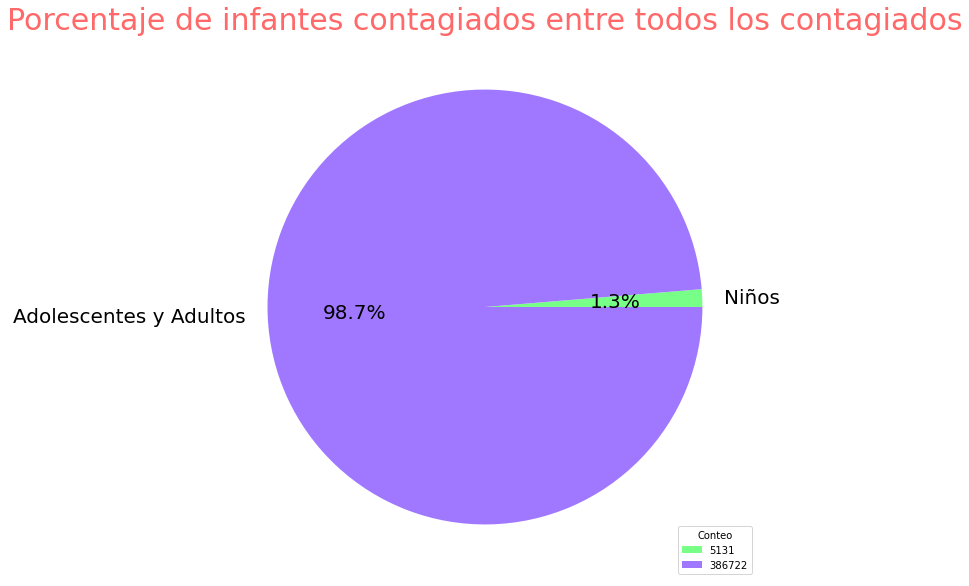

In [40]:
#Creating a graph to obtain the number of infected children among all patients.
ninos_cont = df_null[(df_null['AGE'] < 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]
adultos_cont = df_null[(df_null['AGE'] >= 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]

labels = ["Niños", "Adolescentes y Adultos"]
sizes = [ninos_cont, adultos_cont]
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre todos los contagiados', color = '#FF6969', fontsize = 30)
plt.legend([ninos_cont, adultos_cont], loc = 'lower right', title = 'Conteo')
plt.show()

In [41]:
print("Niños contagiados: ", ninos_cont)
print("Adolescentes y adultos contagiados: ", adultos_cont)

Niños contagiados:  5131
Adolescentes y adultos contagiados:  386722


##### We have to take into account that there are 345 missing data in the age column, and here we reflect a lack of 126 people who are infected, but do not have data on their age.

### Porcentaje de mortalidad entre los niños contagiados

In [42]:
# Creating a variable or array containing only the infected children.
kids_deaths = df_kids[(df_kids['Covid_Not_Covid'] == 1)]

In [43]:
# Checking the count of death and alive children.
kids_deaths["DEAD"].value_counts()

2    4988
1     143
Name: DEAD, dtype: int64

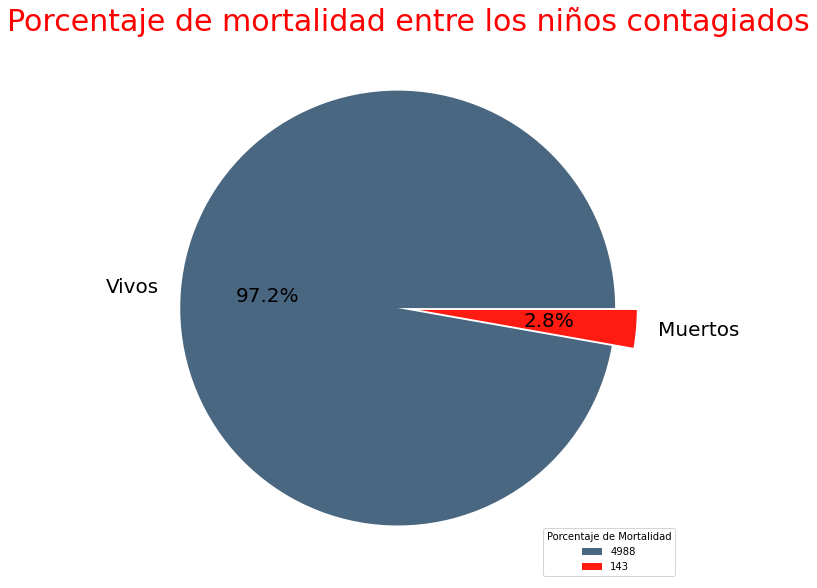

In [44]:
# Creating the graph to better observe the percentage of mortality.
labels = ["Vivos", "Muertos"]
sizes = kids_deaths['DEAD'].value_counts()
colors = ['#496780', '#FF1B12']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Porcentaje de mortalidad entre los niños contagiados',color = 'red',fontsize = 30)
plt.legend(kids_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Porcentaje de Mortalidad')
plt.show()